# Probe Detection Using Deep Learning
---

### Outline
- System Selection
- 
- Model Testing
    - Train 
    - 
- Inference with Custom Model
- Evaluation
- Future Improvements

The results of this code are accompanied in the following [Report](REport).

## System Selection and Setup


The selection test models are **YOLOv8, RT-DETR, YOLO-NAS ** based on:
- State of Art (speed and acccuracy)
- Reasonable Computational Requirements
- Edge Deployment Scnearios (Jetson platforms) 

### Preprocessing
Using Roboflows Dataset tool I apply the following preprocessing.

    1. Auto-Orient
    2. Resize (Strectch 640x640)
    3. Auto-Adjust Contrast (Using Adaptive Equalization)
    4. Grayscale
#3 Augementation
Creating augmented version fo each image in training set by **By applying Horizontal Flip, and Vertical Flip**

## YOLOv8 Test

Is a state of the art with reasonable computational requirements, speed, and accuracy. 


In [1]:
import os
from ultralytics import YOLO
from IPython import display
from IPython.display import display, Image


# Set up home directory
HOME = os.getcwd()
print(f"Current working directory: {HOME}")

# Install required library (ensure ultralytics is installed)
!pip install ultralytics

# Verify YOLO setup
import ultralytics
ultralytics.checks()

# Ensure dataset directory exists
datasets_path = os.path.join(HOME, 'data/probe_preprocessed_YOLOv8')
os.makedirs(datasets_path, exist_ok=True)

# Change directory to datasets (if needed)
os.chdir(datasets_path)
print(f"Dataset directory: {os.getcwd()}")



Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24201MiB)
Setup complete ✅ (32 CPUs, 125.6 GB RAM, 128.4/960.2 GB disk)
Dataset directory: /home/cjs/Documents/Probe-Detection-Using-Deep-Learning/notebook/data/probe_preprocessed_YOLOv8


### Train YOLOv8 model

In [2]:
model = YOLO('yolov8s.pt')  # Change 'yolov8n.pt' to the desired YOLOv8 variant
model.train(data=f"{datasets_path}/data.yaml", epochs=15, batch=16, imgsz=640)

New https://pypi.org/project/ultralytics/8.3.57 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24201MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/home/cjs/Documents/Probe-Detection-Using-Deep-Learning/notebook/data/probe_preprocessed_YOLOv8/data.yaml, epochs=15, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augm

train: Scanning /home/cjs/Documents/Probe-Detection-Using-Deep-Learning/notebook/data/probe_preprocessed_YOLOv8/train/labels.cache... 648 images, 1 backgrounds, 0 corrupt: 100%|██████████| 648/648 [00:00<?, ?it/s]
/home/cjs/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /home/cjs/Documents/Probe-Detection-Using-Deep-Learning/notebook/data/probe_preprocessed_YOLOv8/valid/labels.cache... 61 images, 0 backgrounds, 0 corrupt: 100%|██████████| 61/61 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train2
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15      3.89G      1.482      3.553      1.473         12        640: 100%|██████████| 41/41 [00:02<00:00, 15.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.92it/s]

                   all         61         61      0.566       0.41      0.425       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15      3.96G      1.533      1.891      1.497         19        640: 100%|██████████| 41/41 [00:02<00:00, 17.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 17.68it/s]

                   all         61         61      0.118      0.393     0.0898     0.0447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15      3.96G      1.547       1.81      1.546         18        640: 100%|██████████| 41/41 [00:02<00:00, 18.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 17.42it/s]

                   all         61         61      0.151       0.18      0.131     0.0514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15      3.96G      1.518      1.645      1.535          9        640: 100%|██████████| 41/41 [00:02<00:00, 18.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 17.37it/s]

                   all         61         61      0.263      0.377      0.204      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15      3.83G      1.482      1.629      1.483         17        640: 100%|██████████| 41/41 [00:02<00:00, 18.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 17.14it/s]

                   all         61         61      0.595      0.508      0.535      0.333


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15      3.83G      1.375      1.439      1.444          8        640: 100%|██████████| 41/41 [00:02<00:00, 17.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 17.16it/s]

                   all         61         61      0.784       0.77      0.821      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15      3.82G       1.25      1.275      1.369          8        640: 100%|██████████| 41/41 [00:02<00:00, 18.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.77it/s]

                   all         61         61       0.82      0.787      0.843      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15      3.95G      1.188      1.165      1.313          7        640: 100%|██████████| 41/41 [00:02<00:00, 18.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 17.42it/s]

                   all         61         61       0.88      0.839      0.918      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15      3.83G      1.104      1.048      1.257          8        640: 100%|██████████| 41/41 [00:02<00:00, 18.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.98it/s]

                   all         61         61      0.812      0.754      0.851      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15      3.82G      1.056      1.058      1.246          8        640: 100%|██████████| 41/41 [00:02<00:00, 18.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 17.51it/s]

                   all         61         61      0.981      0.847      0.925      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15      3.82G     0.9672     0.9066      1.188          7        640: 100%|██████████| 41/41 [00:02<00:00, 18.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 18.11it/s]

                   all         61         61      0.963      0.852       0.92      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15      3.96G     0.9296     0.8507      1.148          8        640: 100%|██████████| 41/41 [00:02<00:00, 18.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 17.95it/s]

                   all         61         61      0.946      0.868      0.949      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15      3.83G     0.8994      0.776       1.14          8        640: 100%|██████████| 41/41 [00:02<00:00, 18.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 18.35it/s]

                   all         61         61      0.953      0.869      0.964      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15      3.83G     0.8655     0.7145       1.12          8        640: 100%|██████████| 41/41 [00:02<00:00, 18.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 18.70it/s]

                   all         61         61      0.935       0.94      0.969      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15      3.82G     0.7896     0.6859      1.089          8        640: 100%|██████████| 41/41 [00:02<00:00, 18.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 17.90it/s]

                   all         61         61      0.949      0.917      0.971      0.808



15 epochs completed in 0.011 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 22.5MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24201MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.90it/s]


                   all         61         61      0.949      0.917      0.971      0.808
Speed: 0.1ms preprocess, 1.0ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f2f38f66500>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [12]:
TRAIN_RESULTS = os.path.join(HOME, 'data/probe_preprocessed_YOLOv8/runs/detect/train2')

### Display Training Results

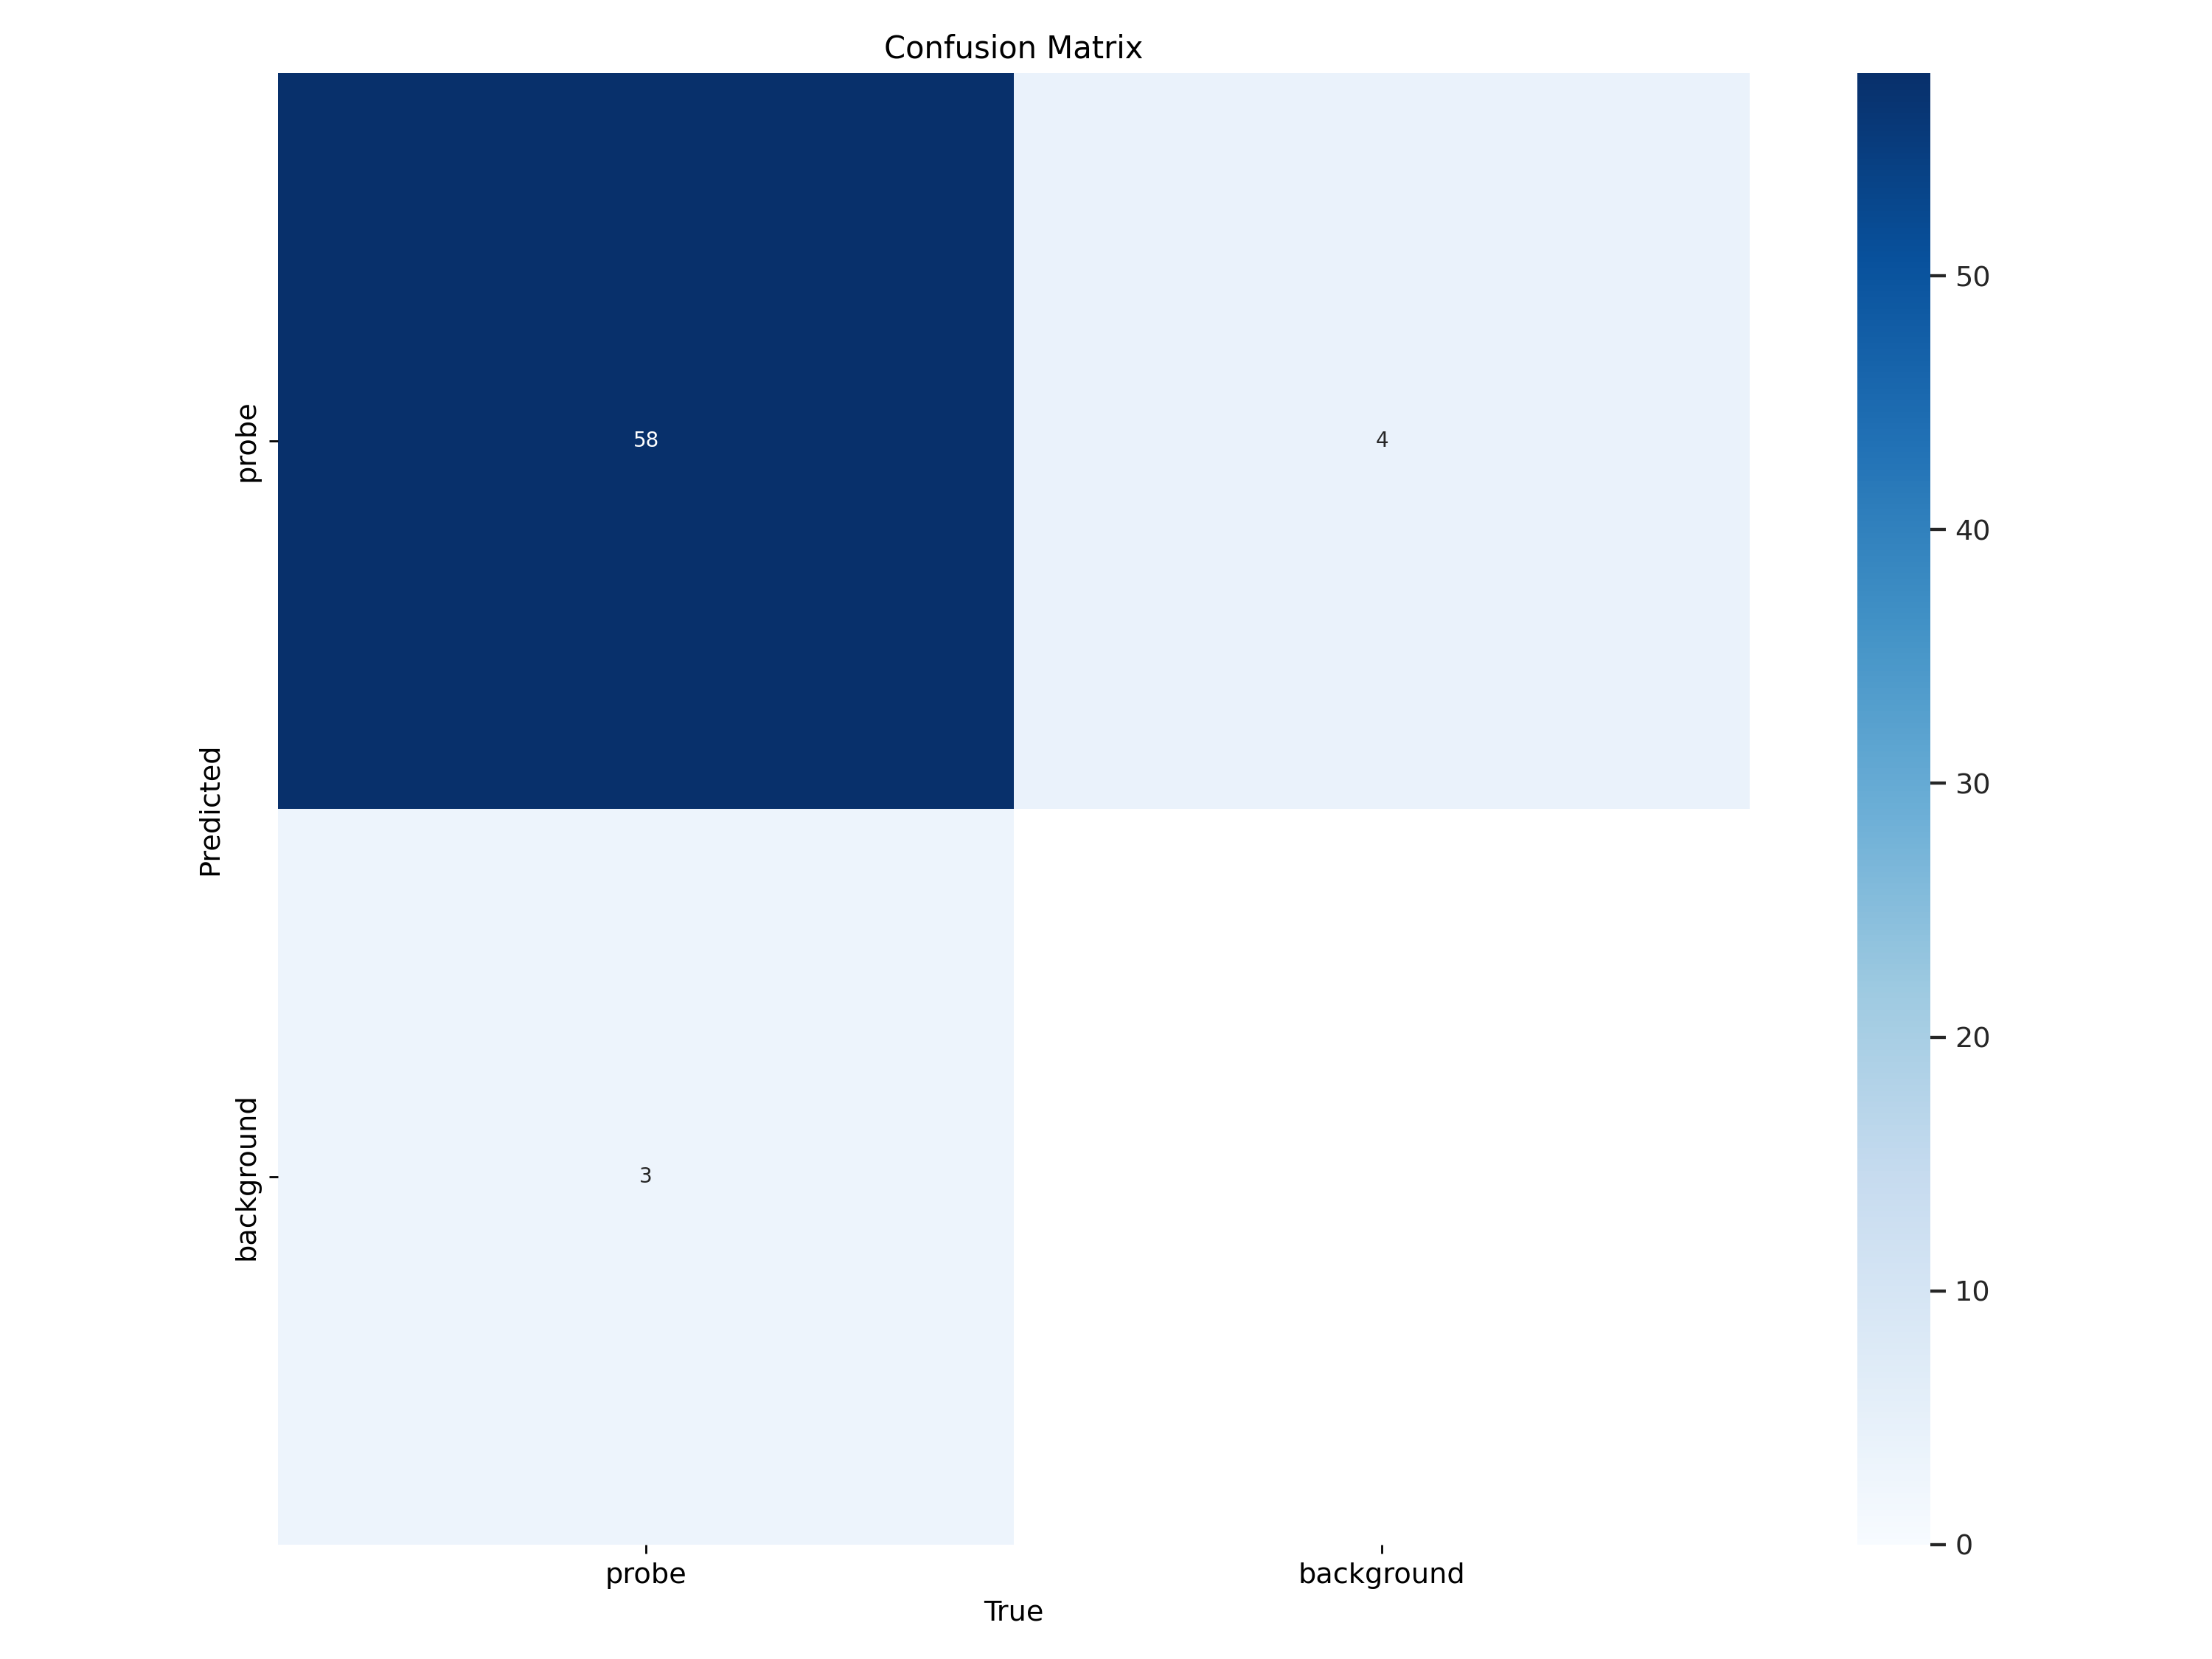

In [13]:
Image(filename=f'{TRAIN_RESULTS}/confusion_matrix.png', width=1000)

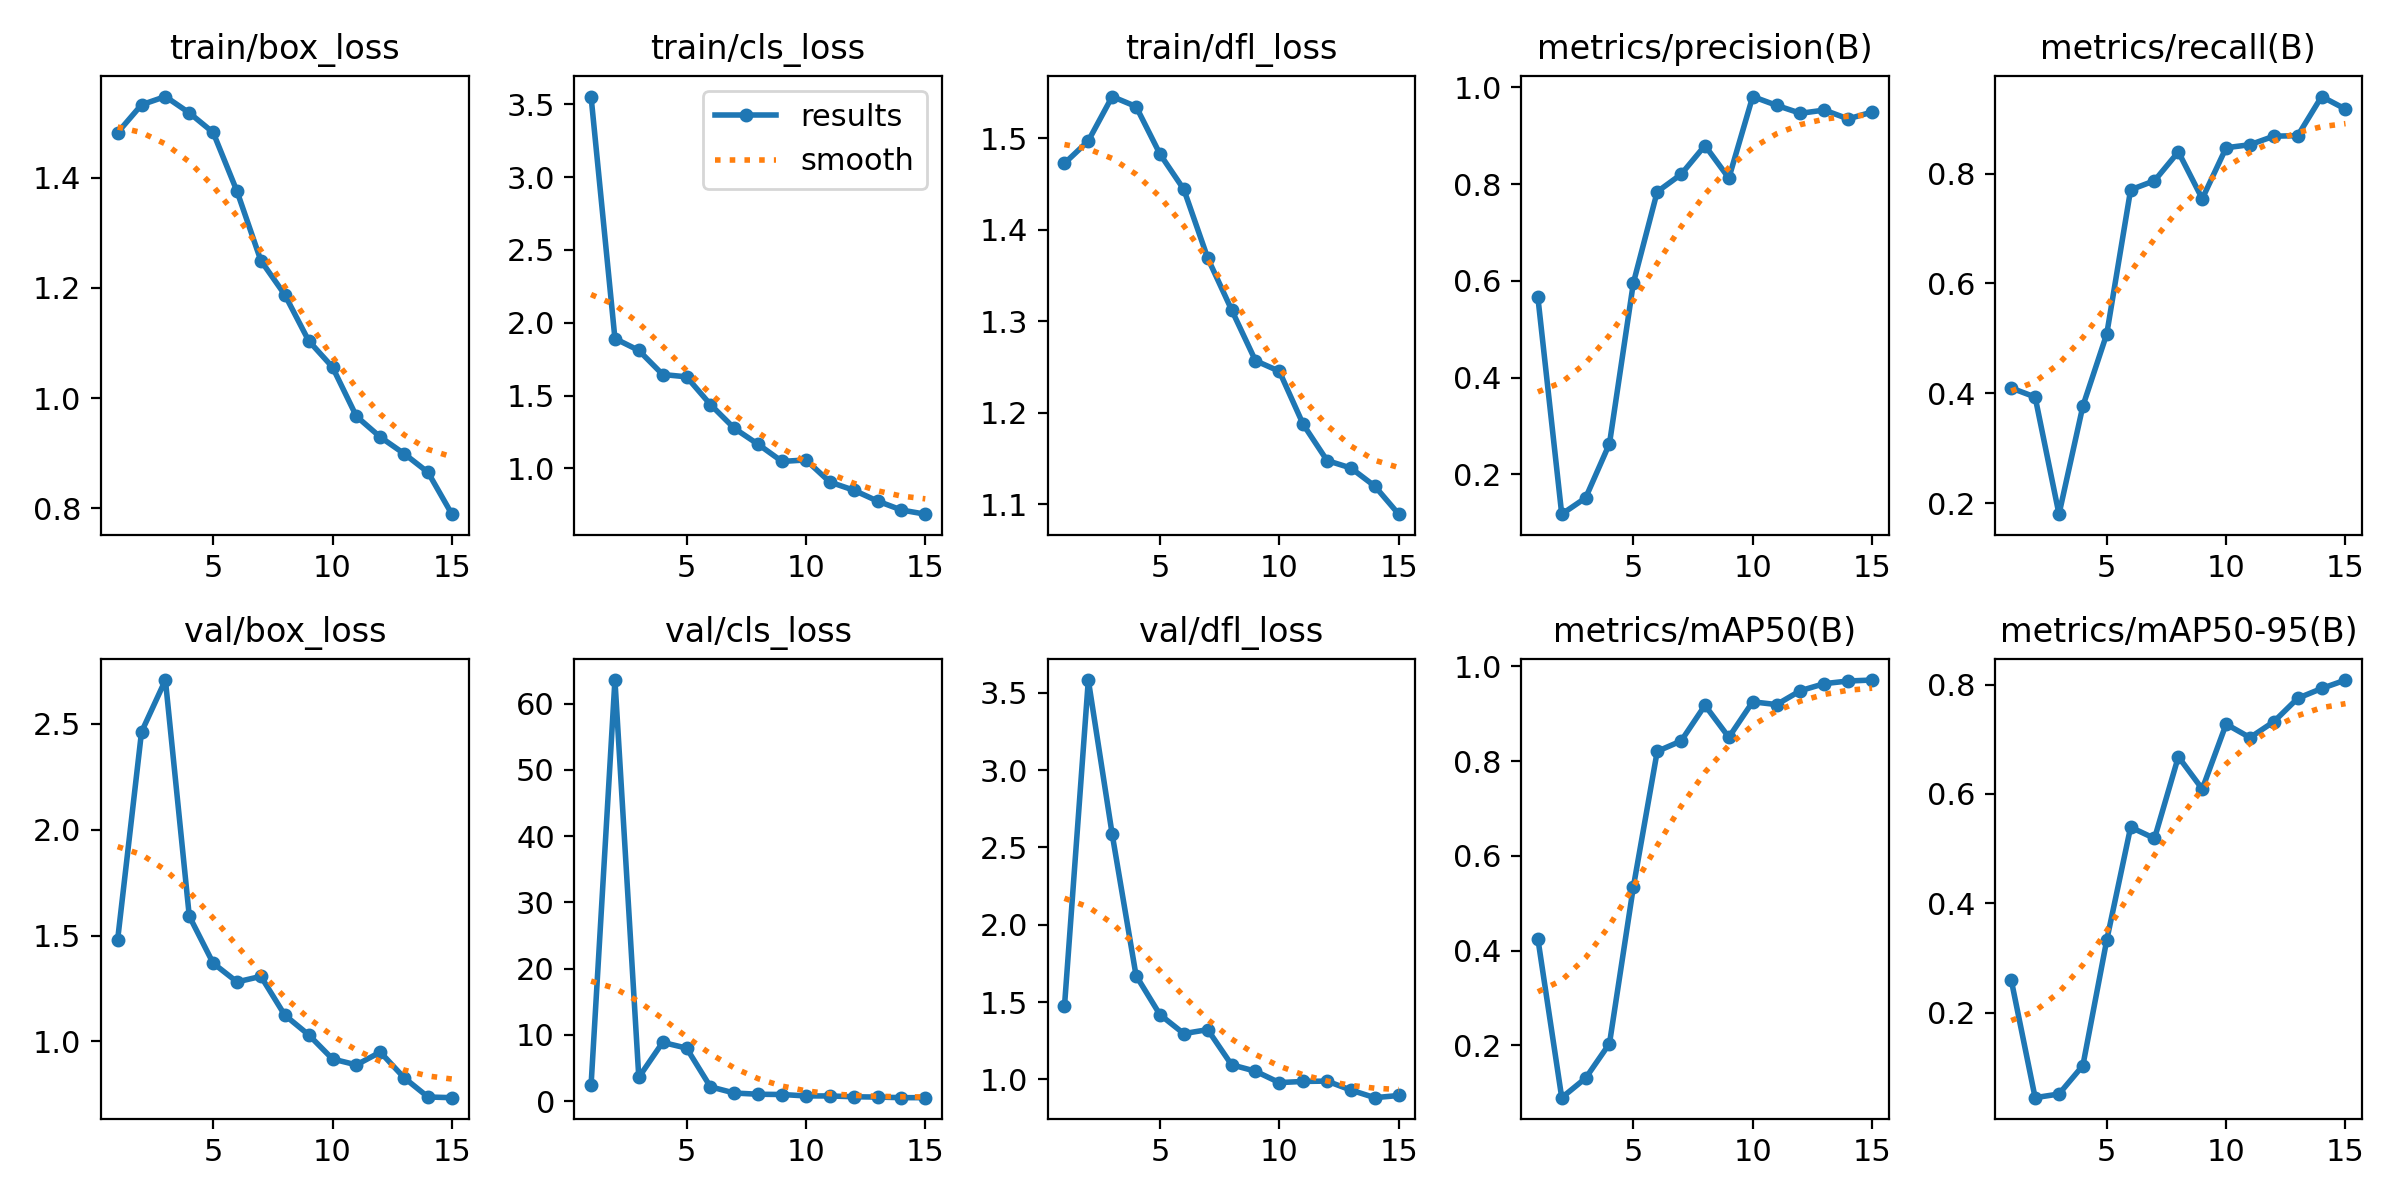

In [14]:

Image(filename=f'{TRAIN_RESULTS}/results.png', width=1000)


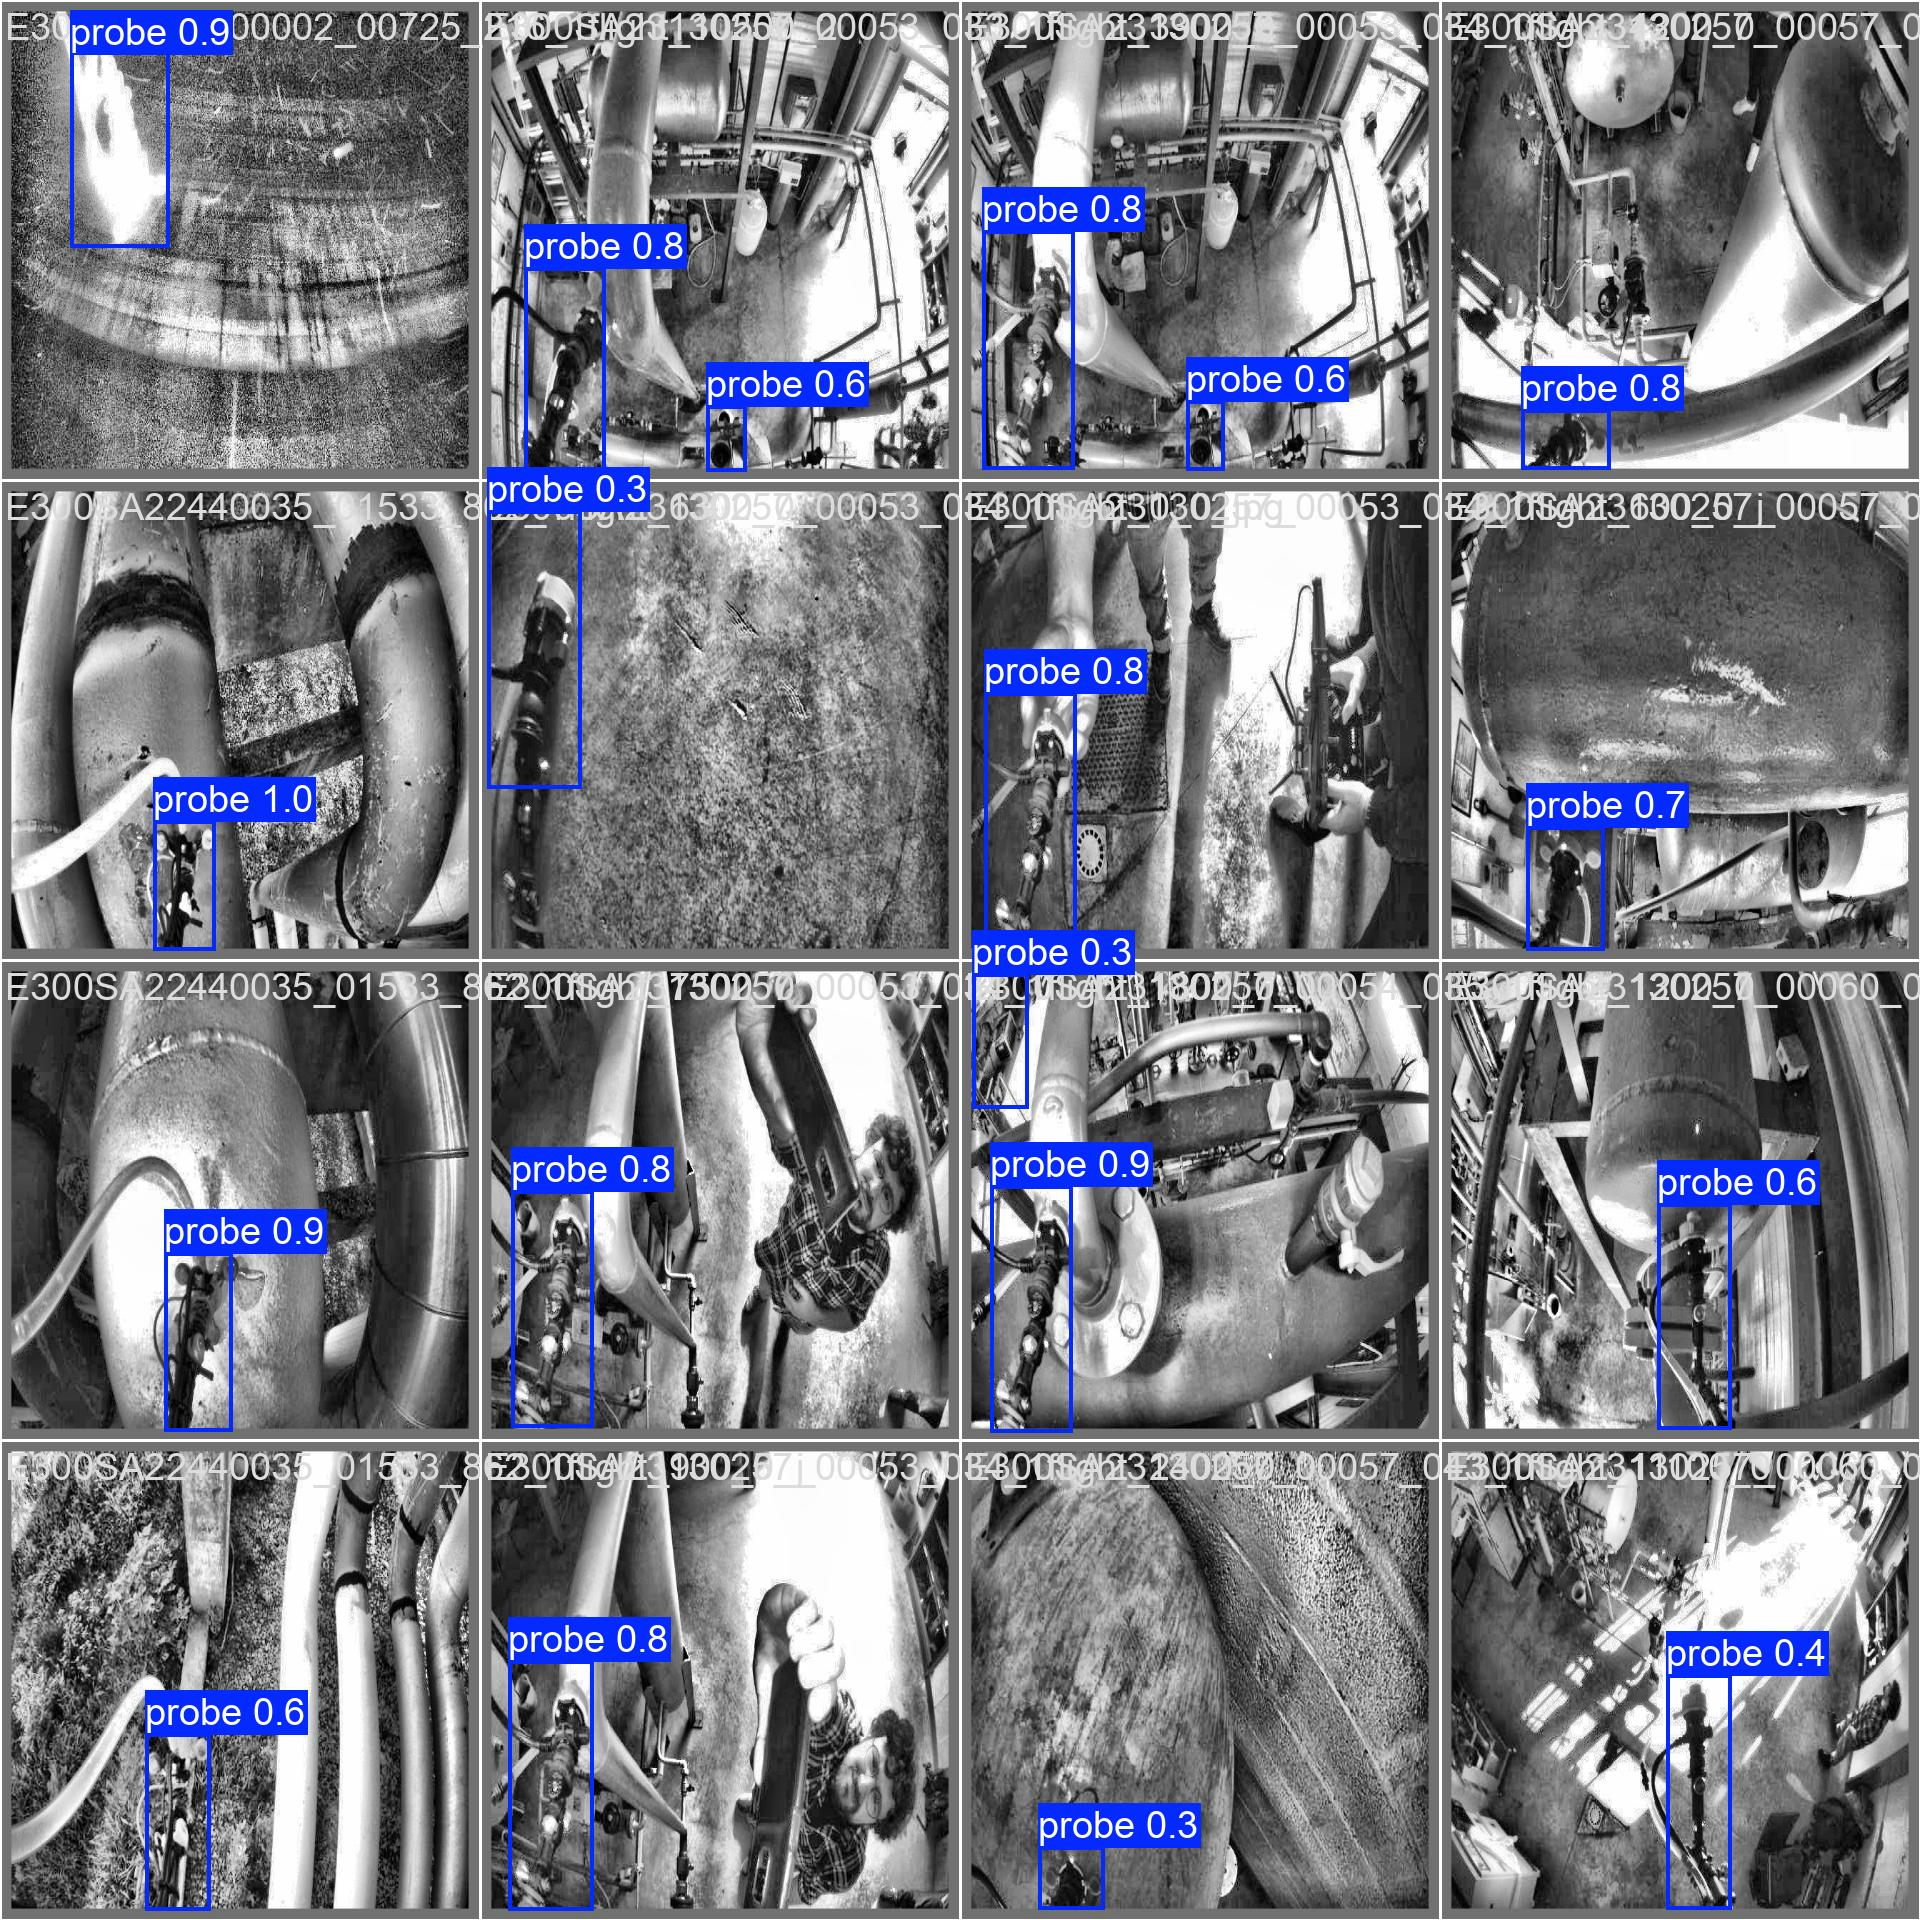

In [15]:
Image(filename=f'{TRAIN_RESULTS}/val_batch0_pred.jpg', width=1000)

### Validate Custom Model

In [ ]:
# After training, perform predictions on the test set
test_images_path = os.path.join(datasets_path, 'test', 'images')  # Path to test images
best_model_path = os.path.join(datasets_path, 'runs', 'detect', 'train', 'weights', 'best.pt')  # Path to the trained model weights
print(best_model_path)
model = YOLO(best_model_path)  # load a custom model

# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered


/home/cjs/Documents/Probe-Detection-Using-Deep-Learning/notebook/data/probe_preprocessed_YOLOv8/runs/detect/train/weights/best.pt
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24201MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /home/cjs/Documents/Probe-Detection-Using-Deep-Learning/notebook/data/probe_preprocessed_YOLOv8/valid/labels.cache... 61 images, 0 backgrounds, 0 corrupt: 100%|██████████| 61/61 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.02it/s]


                   all         61         61      0.983      0.965      0.982      0.874
Speed: 0.3ms preprocess, 1.2ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/val7
0.8737950532688246
0.9817238113645148
0.9664809587749815
[     0.8738]


In [17]:
# Validate and predict using the trained model
model = YOLO(best_model_path)  # Load the trained model
results = model.predict(
    source=test_images_path,  # Path to test images
    conf=0.25,                # Confidence threshold for predictions
    save=True                 # Save prediction outputs
)


image 1/31 /home/cjs/Documents/Probe-Detection-Using-Deep-Learning/notebook/data/probe_preprocessed_YOLOv8/test/images/E300PREMP00002_00725_216_1flight_5100_2_jpg.rf.1522ac7412b954e3df6fdd11ff8bac19.jpg: 640x640 1 probe, 1.9ms
image 2/31 /home/cjs/Documents/Probe-Detection-Using-Deep-Learning/notebook/data/probe_preprocessed_YOLOv8/test/images/E300PREMP00002_00726_217_1flight_12600_2_jpg.rf.51e6feacb94057a1c90e10732f0e39b7.jpg: 640x640 1 probe, 2.1ms
image 3/31 /home/cjs/Documents/Probe-Detection-Using-Deep-Learning/notebook/data/probe_preprocessed_YOLOv8/test/images/E300PREMP00002_00726_217_1flight_1800_2_jpg.rf.d82bf9174ce69fb8995e47a19ecb8f78.jpg: 640x640 1 probe, 2.1ms
image 4/31 /home/cjs/Documents/Probe-Detection-Using-Deep-Learning/notebook/data/probe_preprocessed_YOLOv8/test/images/E300PREMP00002_00726_217_1flight_2400_2_jpg.rf.b679758028c46341fc5cfeacc5db574c.jpg: 640x640 1 probe, 1.9ms
image 5/31 /home/cjs/Documents/Probe-Detection-Using-Deep-Learning/notebook/data/probe_pre

### Inference with Custom Model

In [25]:
test_model_path = os.path.join(datasets_path, 'test', 'images')  # Path to the trained model weights
model.predict(data=f"{datasets_path}/data.yaml", epochs=15, batch=16, imgsz=640, source=test_model_path, save=True )

/home/cjs/Documents/Probe-Detection-Using-Deep-Learning/notebook/data/probe_preprocessed_YOLOv8

image 1/31 /home/cjs/Documents/Probe-Detection-Using-Deep-Learning/notebook/data/probe_preprocessed_YOLOv8/test/images/E300PREMP00002_00725_216_1flight_5100_2_jpg.rf.1522ac7412b954e3df6fdd11ff8bac19.jpg: 640x640 1 probe, 1.5ms
image 2/31 /home/cjs/Documents/Probe-Detection-Using-Deep-Learning/notebook/data/probe_preprocessed_YOLOv8/test/images/E300PREMP00002_00726_217_1flight_12600_2_jpg.rf.51e6feacb94057a1c90e10732f0e39b7.jpg: 640x640 1 probe, 1.5ms
image 3/31 /home/cjs/Documents/Probe-Detection-Using-Deep-Learning/notebook/data/probe_preprocessed_YOLOv8/test/images/E300PREMP00002_00726_217_1flight_1800_2_jpg.rf.d82bf9174ce69fb8995e47a19ecb8f78.jpg: 640x640 1 probe, 1.5ms
image 4/31 /home/cjs/Documents/Probe-Detection-Using-Deep-Learning/notebook/data/probe_preprocessed_YOLOv8/test/images/E300PREMP00002_00726_217_1flight_2400_2_jpg.rf.b679758028c46341fc5cfeacc5db574c.jpg: 640x640 1 probe, 

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'probe'}
 obb: None
 orig_img: array([[[ 19,  19,  19],
         [ 14,  14,  14],
         [ 11,  11,  11],
         ...,
         [ 13,  13,  13],
         [ 13,  13,  13],
         [ 13,  13,  13]],
 
        [[ 19,  19,  19],
         [ 14,  14,  14],
         [ 11,  11,  11],
         ...,
         [ 13,  13,  13],
         [ 13,  13,  13],
         [ 13,  13,  13]],
 
        [[ 19,  19,  19],
         [ 14,  14,  14],
         [ 11,  11,  11],
         ...,
         [ 13,  13,  13],
         [ 13,  13,  13],
         [ 13,  13,  13]],
 
        ...,
 
        [[105, 105, 105],
         [ 96,  96,  96],
         [ 98,  98,  98],
         ...,
         [ 47,  47,  47],
         [ 45,  45,  45],
         [ 26,  26,  26]],
 
        [[ 83,  83,  83],
         [ 85,  85,  85],
         [100, 100, 100],
         ...,
         [ 45,  45,

Look at some example test results

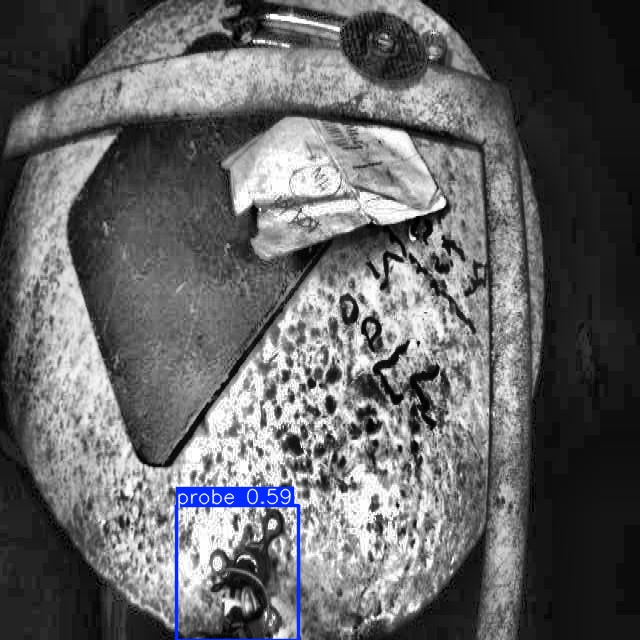

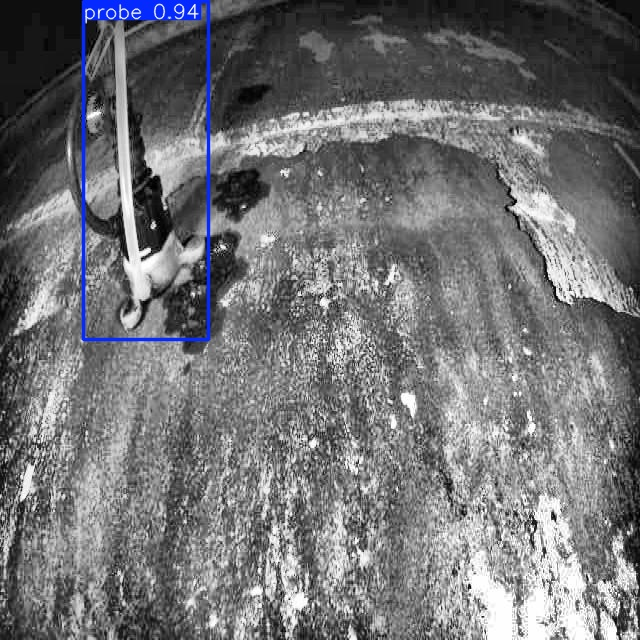

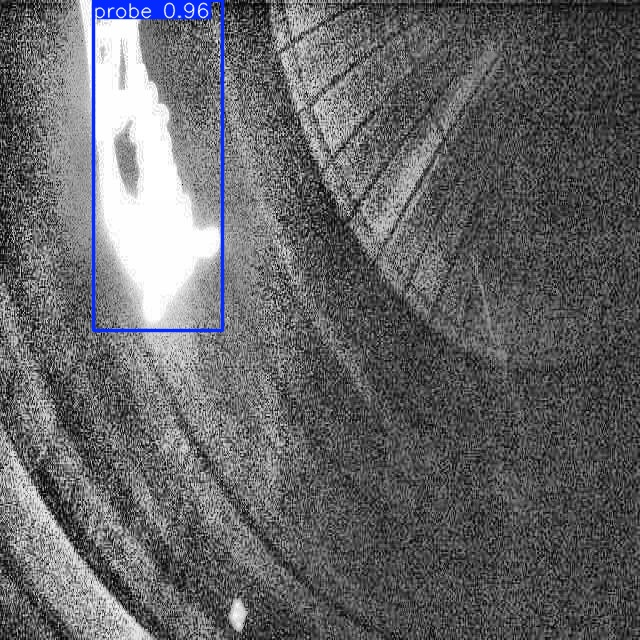

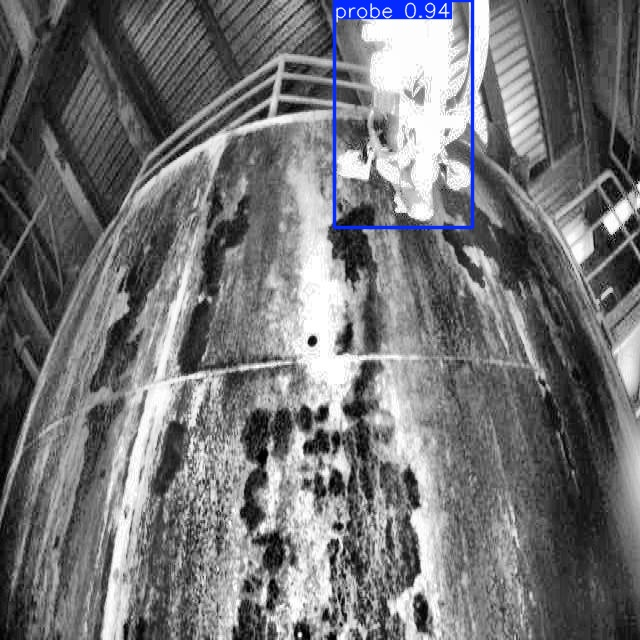

In [27]:
import glob
from IPython.display import Image, display

predict_path = os.path.join(datasets_path, 'runs', 'detect') 

    
# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(predict_path, d) for d in os.listdir(predict_path)
              if os.path.isdir(os.path.join(predict_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:4]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")

# Deploy Your Model to the Edge

In addition to using the Roboflow hosted API for deployment, you can use [Roboflow Inference](https://inference.roboflow.com), an open source inference solution that has powered millions of API calls in production environments. Inference works with CPU and GPU, giving you immediate access to a range of devices, from the NVIDIA Jetson to TRT-compatible devices to ARM CPU devices.

With Roboflow Inference, you can self-host and deploy your model on-device. You can deploy applications using the [Inference Docker containers](https://inference.roboflow.com/quickstart/docker/) or the pip package.

For example, to install Inference on a device with an NVIDIA GPU, we can use:

```
docker pull roboflow/roboflow-inference-server-gpu
```

Then we can run inference via HTTP:

```python
import requests

workspace_id = ""
model_id = ""
image_url = ""
confidence = 0.75
api_key = ""

infer_payload = {
    "image": {
        "type": "url",
        "value": image_url,
    },
    "confidence": confidence,
    "iou_threshold": iou_thresh,
    "api_key": api_key,
}
res = requests.post(
    f"http://localhost:9001/{workspace_id}/{model_id}",
    json=infer_object_detection_payload,
)

predictions = res.json()
```

Above, set your Roboflow workspace ID, model ID, and API key.

- [Find your workspace and model ID](https://docs.roboflow.com/api-reference/workspace-and-project-ids?ref=blog.roboflow.com)
- [Find your API key](https://docs.roboflow.com/api-reference/authentication?ref=blog.roboflow.com#retrieve-an-api-key)

Also, set the URL of an image on which you want to run inference. This can be a local file.

_To use your YOLOv5 model commercially with Inference, you will need a Roboflow Enterprise license, through which you gain a pass-through license for using YOLOv5. An enterprise license also grants you access to features like advanced device management, multi-model containers, auto-batch inference, and more._